**Women's E-Commerce Clothing Reviews** 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

df = pd.read_excel("/content/drive/MyDrive/DeGatto Project/EDA + Models/Aspect Annotated Data.xlsx")

df.drop(['Unnamed: 0'], axis = 1, inplace = True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def remove_punc(df):
    new_text= re.sub("n't",'not', df)
    new_text= re.sub('[^\w\s]','', df)
    return new_text

def tokenizze(df):
    newdata= word_tokenize(df)
    return newdata

def remove_num(df):
    text_without_num=[w for w in df if w.isalpha()]
    return text_without_num

def remove_stops(df):
    newdata=[t for t in df if t not in new_stopping_words]
    return newdata

def Cleaning_process(df):
    processed_text=remove_punc(str(df))
    tokenized_data=tokenizze(processed_text.lower())
    textwithoutnum= remove_num(tokenized_data)
    data=remove_stops(textwithoutnum)
    return " ".join(data)
df['ReviewText'] = df['ReviewText'].apply(Cleaning_process)
df_rest = df.drop(['ReviewText'], axis = 1).replace(['pos', 'no', 'neg', 'neu'], [3, 0, 1, 2])

df.drop(['Size', 'Material', 'Design', 'Comfort'], axis = 1, inplace = True)
df = df.join(df_rest)


# EDA 

In [5]:
x = df["ReviewText"]
size = df["Size"]
material = df['Material']
design = df['Design']
comfort = df['Comfort']

In [6]:
dfs = df[['ReviewText', 'Size']]
dfm = df[['ReviewText', 'Material']]
dfd = df[['ReviewText', 'Design']]
dfc = df[['ReviewText', 'Comfort']]

# **Size**

In [7]:
dfs.Size.value_counts()

3    1059
0     853
1     577
2     402
Name: Size, dtype: int64

In [8]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = dfs[(dfs['Size']==3)]
df_minority_1 =  dfs[(dfs['Size']==0)] 
df_minority_2 = dfs[(dfs['Size']==1)] 
df_minority_3 = dfs[(dfs['Size']==2)]

# upsample minority class
df_minority_upsampled_1 = resample(df_minority_1, 
                                 replace=True,    # sample with replacement
                                 n_samples=1059 , # to match majority class
                                 random_state=42)  # reproducible results

df_minority_upsampled_2 = resample(df_minority_2, 
                                 replace=True,    # sample with replacement
                                 n_samples=1059 , # to match majority class
                                 random_state=45)  

df_minority_upsampled_3 = resample(df_minority_3, 
                                 replace=True,    # sample with replacement
                                 n_samples=1059 , # to match majority class
                                 random_state=47)  # reproducible results
                   
# Combine majority class with upsampled minority class
df_upsampled_1 = pd.concat([df_minority_upsampled_1, df_minority_upsampled_2, df_minority_upsampled_3, df_majority])

df_upsampled_1.Size.value_counts()

0    1059
1    1059
2    1059
3    1059
Name: Size, dtype: int64

# **Material**

In [9]:
dfm.Material.value_counts()

0    1568
3     950
1     259
2     114
Name: Material, dtype: int64

In [10]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = dfm[(dfm['Material']==0)]
df_minority_1 =  dfm[(dfm['Material']==3)] 
df_minority_2 = dfm[(dfm['Material']==1)] 
df_minority_3 = dfm[(dfm['Material']==2)]

# upsample minority class
df_minority_upsampled_1 = resample(df_minority_1, 
                                 replace=True,    # sample with replacement
                                 n_samples=1568 , # to match majority class
                                 random_state=42)  # reproducible results

df_minority_upsampled_2 = resample(df_minority_2, 
                                 replace=True,    # sample with replacement
                                 n_samples=1568 , # to match majority class
                                 random_state=45)  

df_minority_upsampled_3 = resample(df_minority_3, 
                                 replace=True,    # sample with replacement
                                 n_samples=1568 , # to match majority class
                                 random_state=47)  # reproducible results
                   
# Combine majority class with upsampled minority class
df_upsampled_2 = pd.concat([df_minority_upsampled_1, df_minority_upsampled_2, df_minority_upsampled_3, df_majority])

df_upsampled_2.Material.value_counts()

3    1568
1    1568
2    1568
0    1568
Name: Material, dtype: int64

# **Resampling Design**

In [11]:
dfd.Design.value_counts()

0    1797
3     936
1      92
2      66
Name: Design, dtype: int64

In [12]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = dfd[(dfd['Design']==0)]
df_minority_1 =  dfd[(dfd['Design']==3)] 
df_minority_2 = dfd[(dfd['Design']==1)] 
df_minority_3 = dfd[(dfd['Design']==2)]

# upsample minority class
df_minority_upsampled_1 = resample(df_minority_1, 
                                 replace=True,    # sample with replacement
                                 n_samples=1797 , # to match majority class
                                 random_state=42)  # reproducible results

df_minority_upsampled_2 = resample(df_minority_2, 
                                 replace=True,    # sample with replacement
                                 n_samples=1797 , # to match majority class
                                 random_state=45)  

df_minority_upsampled_3 = resample(df_minority_3, 
                                 replace=True,    # sample with replacement
                                 n_samples=1797 , # to match majority class
                                 random_state=47)  # reproducible results
                   
# Combine majority class with upsampled minority class
df_upsampled_4 = pd.concat([df_minority_upsampled_1, df_minority_upsampled_2, df_minority_upsampled_3, df_majority])

df_upsampled_4.Design.value_counts()

3    1797
1    1797
2    1797
0    1797
Name: Design, dtype: int64

# **Resampling Comfort**

In [13]:
dfc.Comfort.value_counts()

0    1864
3     982
1      40
2       5
Name: Comfort, dtype: int64

In [14]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = dfc[(dfc['Comfort']==0)]
df_minority_1 = dfc[(dfc['Comfort']==3)] 
df_minority_2 = dfc[(dfc['Comfort']==1)] 
df_minority_3 = dfc[(dfc['Comfort']==2)]

# upsample minority class
df_minority_upsampled_1 = resample(df_minority_1, 
                                 replace=True,    # sample with replacement
                                 n_samples=1864 , # to match majority class
                                 random_state=42)  # reproducible results

df_minority_upsampled_2 = resample(df_minority_2, 
                                 replace=True,    # sample with replacement
                                 n_samples=1864 , # to match majority class
                                 random_state=45)  

df_minority_upsampled_3 = resample(df_minority_3, 
                                 replace=True,    # sample with replacement
                                 n_samples=1864 , # to match majority class
                                 random_state=47)  # reproducible results
                   
# Combine majority class with upsampled minority class
df_upsampled_5 = pd.concat([df_minority_upsampled_1, df_minority_upsampled_2, df_minority_upsampled_3, df_majority])

df_upsampled_5.Comfort.value_counts()

3    1864
1    1864
2    1864
0    1864
Name: Comfort, dtype: int64

# **DL models**



## **preparing**

In [15]:
#importing 
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF are word frequency scores that try to highlight words that are more interesting,

In [50]:
x = df_upsampled_1['ReviewText'].values
y = df_upsampled_1['Size'].values

In [51]:
import pickle
from keras.preprocessing.text import Tokenizer
num_words = 10000
with open('/content/drive/MyDrive/DeGatto Project/EDA + Models/tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)
xtokens= tokenizer2.texts_to_sequences(x)

In [52]:
#padding 
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen=200
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)

In [53]:
#train_test splot
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xpad, y, test_size=0.2, stratify=y,random_state=42)

## **LSTM MODEL**

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 10, restore_best_weights=True)

In [55]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GRU,Bidirectional
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=50,input_length=maxlen))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.1))
model.add(Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 50)           500000    
                                                                 
 dropout_9 (Dropout)         (None, 200, 50)           0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 200, 100)         40400     
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 200, 100)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 100)              

In [56]:
model.fit(x_train,y_train, epochs=6, batch_size=12, validation_data=(x_test , y_test))#, callbacks= [early_stop])

Epoch 1/6
283/283 [==============================] - 108s 342ms/step - loss: 1.1632 - accuracy: 0.4498 - val_loss: 0.8405 - val_accuracy: 0.6710
Epoch 2/6
283/283 [==============================] - 98s 346ms/step - loss: 0.6486 - accuracy: 0.7651 - val_loss: 0.6124 - val_accuracy: 0.7830
Epoch 3/6
283/283 [==============================] - 90s 317ms/step - loss: 0.3895 - accuracy: 0.8781 - val_loss: 0.5208 - val_accuracy: 0.8361
Epoch 4/6
283/283 [==============================] - 90s 317ms/step - loss: 0.2575 - accuracy: 0.9221 - val_loss: 0.5692 - val_accuracy: 0.8278
Epoch 5/6
283/283 [==============================] - 90s 317ms/step - loss: 0.1805 - accuracy: 0.9460 - val_loss: 0.6704 - val_accuracy: 0.8149
Epoch 6/6
283/283 [==============================] - 94s 333ms/step - loss: 0.1445 - accuracy: 0.9572 - val_loss: 0.6256 - val_accuracy: 0.8349


In [58]:
model_loss = pd.DataFrame(model.history.history)
model_loss_1 = model_loss.drop(['val_loss', 'loss'], axis = 1)

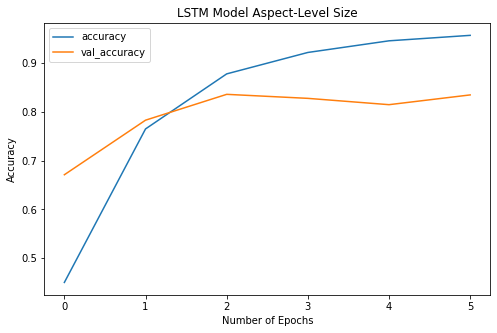

In [59]:
model_loss_1.plot(figsize = (8,5))
plt.title("LSTM Model Aspect-Level Size")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

In [60]:
model.save('/content/drive/My Drive/DeGatto Project/EDA + Models/weights/size_model.model')

In [22]:
review1 = ["love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite"]
tokens = tokenizer2.texts_to_sequences(review1) 
tokens_pad = pad_sequences(tokens, padding='post', maxlen=200)
mod_pred = model.predict(tokens_pad)
df_pred = pd.DataFrame(mod_pred, index=review1)
df_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: 0 if x>=0.5 else 2)
df_pred

NameError: ignored

In [16]:
model_loss = pd.DataFrame(model.history.history)
model_loss_1 = model_loss.drop(['val_loss', 'loss'], axis = 1)

KeyError: ignored

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('/content/drive/My Drive/DeGatto Project/EDA + Models/weights/material_model.model')

In [14]:
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
with open('/content/drive/MyDrive/DeGatto Project/EDA + Models/tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)
x = pd.DataFrame(['i read the previous reviews and had hoped that the exclamations about the color being inaccurate were exaggerated however they are sadly very true let me be clear that this is a beautiful comfortable piece of clothing when you put it on it feels thick and of very good quality and while the pattern is interesting and pretty the dark orange color i was expecting is actually a mud brown i think it s unfortunate that retailer misrepresented such a key element of the jacket but i digress the', 
                  'love this top made with 100 cotton a vintage look and flattering details this top is a winner for me i think it fits true to size got my regular size 0 and i did not need the petite and i am fairly short it is somewhat see through but with wearing a nude bra and not wearing it to work i think it can be worn without a cami the perfect lightweight comfortable standout piece for the summer time ', 
                  'great fit smooth comfortable material wrinkles but nothing an iron can t fix beautiful colors i got both the teal and the black ',
                  'went to the store in search of a butter dish tried this dress on a was shocked at how comfortable versatile and all over appealing this dress is i m 10 and the medium hits at my knees as always i think the quality could be better it s not something that will last for years'])
x = x.iloc[:, 0].apply(Cleaning_process)
xtokens= tokenizer2.texts_to_sequences(x)
xpad=pad_sequences(xtokens,padding='post', maxlen=200)
mod_pred = model2.predict(xpad)
df_pred = pd.DataFrame(mod_pred, index=x.values.tolist())

1/1 [==============================] - 0s 245ms/step


In [15]:
df_pred

,0,1,2,3
read previous reviews hoped exclamations color inaccurate exaggerated however sadly true let clear beautiful comfortable piece clothing put feels thick good quality pattern interesting pretty dark orange color expecting actually mud brown think unfortunate retailer misrepresented key element jacket digress,0.002417,0.000134,0.000084,0.997365
love top made cotton vintage look flattering details top winner think fits true size got regular size not need petite fairly short somewhat see wearing nude bra not wearing work think worn without cami perfect lightweight comfortable standout piece summer time,0.993113,0.000243,0.000179,0.006465
great fit smooth comfortable material wrinkles nothing iron fix beautiful colors got teal black,0.000339,0.000230,0.998710,0.000722
went store search butter dish tried dress shocked comfortable versatile appealing dress medium hits knees always think quality could better not something last years,0.001061,0.997950,0.000106,0.000883
